In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"D:\DATA_ANALYSIS\ML_\1\Heart_Disease_Project\data\top10_features.csv")

X = data.drop("target", axis=1)
y = data["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


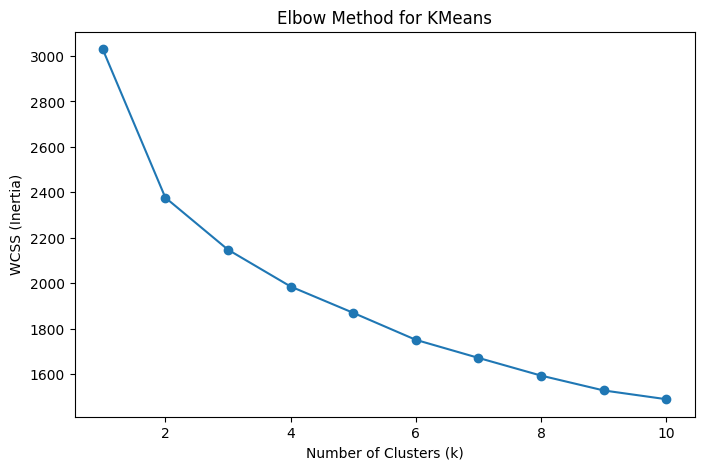

In [3]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.show()

In [4]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_scaled)

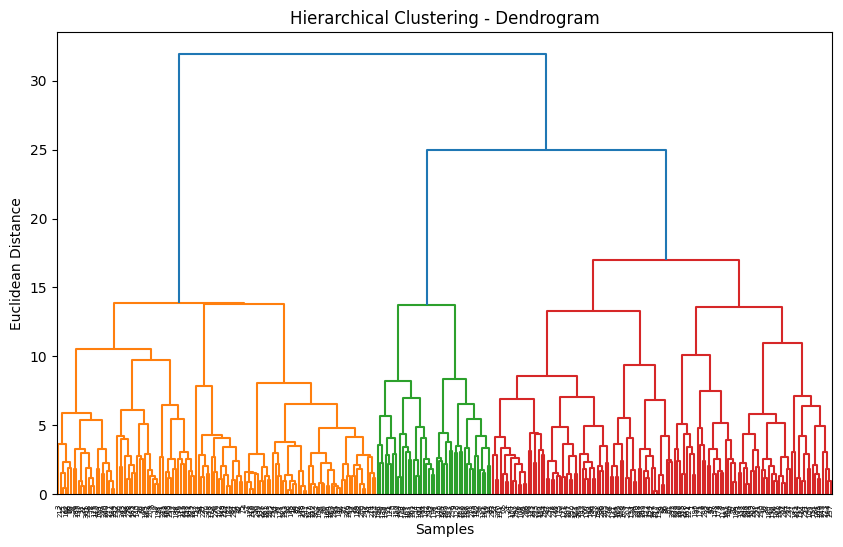

In [5]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Hierarchical Clustering - Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clusters_hc = hc.fit_predict(X_scaled)

In [6]:
data['HC_Cluster'] = clusters_hc
data['KMeans_Cluster'] = clusters_kmeans

print("Cluster vs Target (Hierarchical):")
print(pd.crosstab(data['HC_Cluster'], data['target']))

print("\nCluster vs Target (KMeans):")
print(pd.crosstab(data['KMeans_Cluster'], data['target']))

Cluster vs Target (Hierarchical):
target        0    1
HC_Cluster          
0            61  117
1           103   22

Cluster vs Target (KMeans):
target            0    1
KMeans_Cluster          
0                19  101
1               145   38


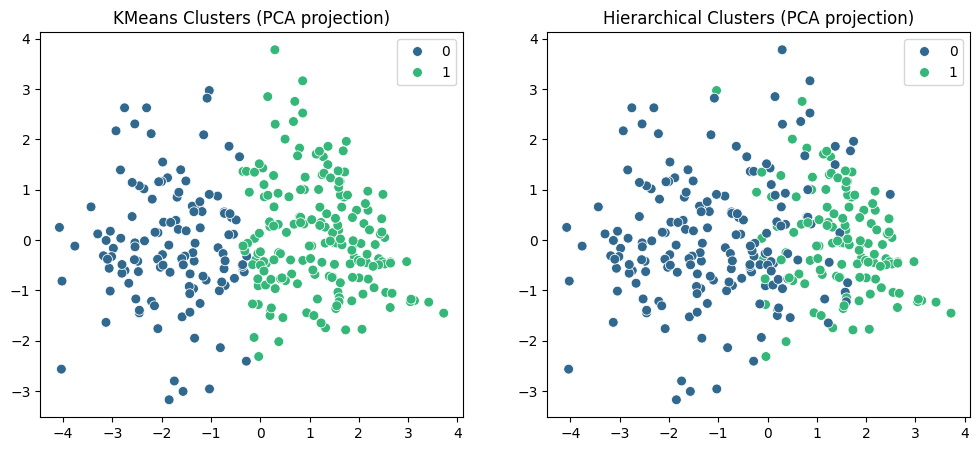

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,5))

# KMeans
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_kmeans, palette="viridis", s=50)
plt.title("KMeans Clusters (PCA projection)")

# Hierarchical
plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_hc, palette="viridis", s=50)
plt.title("Hierarchical Clusters (PCA projection)")

plt.show()